# Metric collect

* FORECAST RESULTS

In [2]:
import pandas as pd

bs = 128
# model_name = f"MADtime_pl_Full_SETKS_FreqDoi_bs{bs}"
# model_name = f"MADtime_pl_Full_SETKS_bs{bs}"
# model_name = f"MADtime_pl_FactOnly_FreqDoi_bs{64}"
# model_name = f"MADtime_pl_FactOnly_SETKS_FreqDoi_CFG_puncond0.8_bs{bs}_fcst"
# model_name = "MADtime_FactOnly_SETKS_learnmean_freqdenoise_bs64_fast"
# model_name = "MADtime_FactOnly_SETKS_learnmean_freqdenoise_puncond0.5_bs64_fcst"
# model_name = "MADfreq_FactOnly_puncond0.5_bs64_fcst"
# model_name = "MADT_FO_SETKS_FD_bs64_fcst"
model_name = "MADTC_NFD_MLP_eps_bs64_condfcst"
# model_name = "MADtime_FactOnly_SETKS_learnmean_freqdenoise_bs64_new"

# * BEST FCST
# model_name = "best_MADtime_pl_FactOnly_FreqDoi"

datasets = ['ECL','ETTh2','ETTm2','Exchange','Weather']

new_df = pd.read_csv(f"../assets/{model_name}.csv")
# new_df = pd.read_csv(f"../assets/{model_name}_.csv")
# new_df = pd.read_csv('../assets/MADtime_pl_doublenorm_FreqDenoise.csv')[['MSE']]
# print(new_df)
new_df = new_df.rename(columns={"MSE": model_name})
new_df = new_df.drop(columns=["CRPS", "method"])
df = pd.read_csv("../assets/results_MSE.csv", delimiter="\t")
# print(df)

df = pd.merge(df, new_df)
# display(df)
# print(df.to_csv('append_MSE.csv'))
# df = pd.concat([df, new_df], axis=1)
df = df.groupby("dataset").mean()
# # df
# df = df[['Dlinear', 'PatchTST', 'CSDI','D3VAE', 'SSSD', 'TMDM', 'mr-diff','MADtime_freqdenoise_bs128']]
df = df[
    [
        # "Dlinear",
        # "PatchTST",
        "CSDI",
        "SSSD",
        "D3VAE",
        "TMDM",
        "mr-diff",
        model_name,
    ]
]
# df = df[['Dlinear', 'PatchTST', 'CSDI', 'SSSD', 'D3VAE','TMDM', 'mr-diff','MADfreq_pl_doublenorm_dp0.3','MADtime_freqdenoise']]
df = df.T
# df = df.drop(columns=['MFRED']).round(4)
# df = df.drop(columns=["MFRED", "ETTh1", "ETTm1"]).round(4)
df = df.round(4)
df = pd.concat([df, df.rank().mean(axis=1).round(2)], axis=1)
display(df)

print(df.to_latex())

,ECL,ETTh2,ETTm2,Exchange,traffic,weather,0
CSDI,0.4581,0.2571,2.1230,1.2557,0.4991,0.1938,3.50
SSSD,1.0257,0.7201,0.8936,2.9004,1.9662,0.6905,5.17
D3VAE,0.8450,1.3961,3.3449,2.1086,6.3583,1.5461,5.67
TMDM,0.4071,0.2508,0.1789,0.7885,0.1805,0.2209,2.67
mr-diff,0.5287,0.2172,0.1700,0.4801,0.2471,0.2078,2.67
MADTC_NFD_MLP_eps_bs64_condfcst,0.3593,0.2079,0.1231,0.3625,0.2226,0.1945,1.33


\begin{tabular}{lrrrrrrr}
\toprule
{} &     ECL &   ETTh2 &   ETTm2 &  Exchange &  traffic &  weather &     0 \\
\midrule
CSDI                            &  0.4581 &  0.2571 &  2.1230 &    1.2557 &   0.4991 &   0.1938 &  3.50 \\
SSSD                            &  1.0257 &  0.7201 &  0.8936 &    2.9004 &   1.9662 &   0.6905 &  5.17 \\
D3VAE                           &  0.8450 &  1.3961 &  3.3449 &    2.1086 &   6.3583 &   1.5461 &  5.67 \\
TMDM                            &  0.4071 &  0.2508 &  0.1789 &    0.7885 &   0.1805 &   0.2209 &  2.67 \\
mr-diff                         &  0.5287 &  0.2172 &  0.1700 &    0.4801 &   0.2471 &   0.2078 &  2.67 \\
MADTC\_NFD\_MLP\_eps\_bs64\_condfcst &  0.3593 &  0.2079 &  0.1231 &    0.3625 &   0.2226 &   0.1945 &  1.33 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_283358/3106560830.py:56: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


* Refinement results

In [14]:
import pandas as pd

bs = 64

# model_name = f"MADtime_pl_FactOnly_SETKS_FreqDoi_CFG_bs{bs}_refine"
# model_name = f"MADtime_pl_FactOnly_SETKS_FreqDoi_CFG_puncond0.8_bs{bs}_refine"
# model_name = f"MADtime_FactOnly_SETKS_learnmean_freqdenoise_puncond0.5_bs{bs}_refine"
model_name = "MADfreq_puncond0.5_bs64_refine"
# model_name = "MADfreq_FactOnly_puncond0.5_bs64_refine"
# assets/MADfreq_FactOnly_puncond0.5_bs64_refine.csv

new_df = pd.read_csv(f"../assets/{model_name}.csv")
# new_df = pd.read_csv('../assets/MADtime_pl_doublenorm_FreqDenoise.csv')[['MSE']]
# print(new_df)
new_df = new_df.rename(columns={"MSE": model_name})
new_df = new_df.drop(columns=["CRPS", "method"])
df = pd.read_csv("../assets/results_MSE.csv", delimiter="\t")
# print(df)

df = pd.merge(df, new_df)

# df = pd.concat([df, new_df], axis=1)
df = df.groupby("dataset").mean()
# # df
# df = df[['Dlinear', 'PatchTST', 'CSDI','D3VAE', 'SSSD', 'TMDM', 'mr-diff','MADtime_freqdenoise_bs128']]
df = df[
    [
        "PatchTST",
        model_name,
    ]
]
# df = df[['Dlinear', 'PatchTST', 'CSDI', 'SSSD', 'D3VAE','TMDM', 'mr-diff','MADfreq_pl_doublenorm_dp0.3','MADtime_freqdenoise']]
df = df.T
# df = df.drop(columns=['MFRED']).round(4)
# df = df.drop(columns=["MFRED", "ETTh1", "ETTm1"]).round(4)
df = df.round(4)
df = pd.concat([df, df.rank().mean(axis=1).round(2)], axis=1)
df

# print(df.to_latex())

,ECL,ETTh2,ETTm2,Exchange,traffic,weather,0
PatchTST,0.4116,0.2026,0.1219,0.5154,0.1784,0.1889,1.17
MADfreq_puncond0.5_bs64_refine,0.8298,0.2610,0.1316,0.4752,1.9287,0.1935,1.83


In [3]:
import pandas as pd

bs = 64
# model_name = f"MADtime_pl_Full_SETKS_FreqDoi_bs{bs}"
# model_name = f"MADtime_pl_Full_SETKS_bs{bs}"
# model_name = f"MADtime_pl_FactOnly_FreqDoi_bs{bs}"
# model_name = "best_MADtime_pl_FactOnly_FreqDoi"
# model_name = "MADtime_pl_doublenorm_FreqDenoise"
# model_name = f"MADfreq_naive_bs{bs}"
# model_name = f"MADfreq_learnmean_bs{bs}_new"
# model_name = "MADfreq_FactOnly_learnmean_bs64_new"
model_name = "MADTC_NFD_MLP_eps_bs64_condfcst"


new_df = pd.read_csv(f"../assets/{model_name}.csv")
# new_df = pd.read_csv('../assets/.csv')[['MSE']]
# print(new_df)
new_df = new_df.rename(columns={"CRPS": model_name})
new_df = new_df.drop(columns=["MSE", "method"])
df = pd.read_csv("../assets/results_CRPS.csv", delimiter="\t")
# print(df)

df = pd.merge(df, new_df)

# display(df)
# print(df.to_csv('append_CRPS.csv'))

# df = pd.concat([df, new_df], axis=1)
df = df.groupby("dataset").mean()
df = df[
    [
        "CSDI",
        "SSSD",
        "D3VAE",
        "TMDM",
        "mr-diff",
        # "MADtime_pl_doublenorm",
        model_name,
    ]
]
# df = df[['Dlinear', 'PatchTST', 'CSDI', 'SSSD', 'D3VAE','TMDM', 'mr-diff','MADfreq_pl_doublenorm_dp0.3','MADtime_freqdenoise']]
df = df.T
# df = df.drop(columns=['MFRED']).round(4)
# df = df.drop(columns=["MFRED", "ETTh1", "ETTm1"]).round(4)
df = df.round(4)
df = pd.concat([df, df.rank().mean(axis=1).round(2)], axis=1)
df

# print(df.to_latex())

,ECL,ETTh2,ETTm2,Exchange,traffic,weather,0
CSDI,0.1939,0.1638,0.4720,0.3028,0.1883,0.1261,3.33
SSSD,0.3216,0.3108,0.3565,0.6743,0.4579,0.3129,5.17
D3VAE,0.3111,0.4173,0.6497,0.5380,0.8314,0.4497,5.67
TMDM,0.1881,0.1591,0.1253,0.2959,0.1076,0.1380,2.00
mr-diff,0.2357,0.1647,0.1293,0.2117,0.1453,0.1506,3.00
MADTC_NFD_MLP_eps_bs64_condfcst,0.1737,0.1477,0.1135,0.2151,0.1462,0.1431,1.83


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../assets/sr_mfred_dlinear_new.csv')
all_df = []
for i, sub_df in df.groupby('ks'):
    all_df.append(sub_df)
all_df = pd.concat(all_df)
# df = df[df['model_name'] != 'Linear Interp.']
name = all_df.pop('model_name')
all_df = pd.concat([name, all_df], axis=1)
all_df = all_df.set_index('model_name')
# print(df[['lps_st']].values.reshape(-1, 5))
# df
# fig, ax = plt.subplots()
# ax.plot([2,4,6,8,16],df[['lps_st']].values.reshape(-1, 5).T)
# ax.plot([2,4,6,8,16],df[['lps_lt']].values.reshape(-1, 5).T)
all_df.round(4)
print(all_df.to_latex(float_format="%.4f"))

\begin{tabular}{lrrrrrr}
\toprule
{} &    mse &     lsd &  con\_err &  lps\_st &  lps\_lt &  ks \\
model\_name                             &        &         &          &         &         &     \\
\midrule
MADTC\_NFD\_DIT\_eps\_bs64\_condNone\_ksNone & 0.0151 & 14.2529 &   0.0046 &  0.0611 &  0.1197 &   3 \\
Cond DDPM                              & 0.0454 & 15.3328 &   0.0322 &  0.0636 &  0.1336 &   3 \\
Linear Interp.                         & 0.0065 & 25.7868 &   0.0006 &  0.1139 &  0.1180 &   3 \\
MADTC\_NFD\_DIT\_eps\_bs64\_condNone\_ksNone & 0.0251 & 14.9071 &   0.0053 &  0.0619 &  0.1222 &   6 \\
Cond DDPM                              & 0.0485 & 15.3374 &   0.0263 &  0.0633 &  0.1294 &   6 \\
Linear Interp.                         & 0.0121 & 33.7377 &   0.0010 &  0.1671 &  0.1429 &   6 \\
MADTC\_NFD\_DIT\_eps\_bs64\_condNone\_ksNone & 0.0391 & 15.1739 &   0.0071 &  0.0631 &  0.1248 &  12 \\
Cond DDPM                              & 0.0509 & 15.3639 &   0.0191 &  0.0629 &  0.1284 

/tmp/ipykernel_210535/2044505674.py:19: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(all_df.to_latex(float_format="%.4f"))


# Data preprocessing

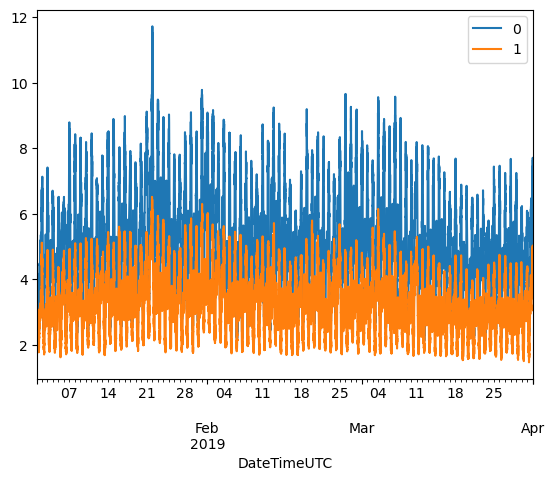

In [3]:
import pandas as pd
import numpy as np

subset = np.random.permutation(26) + 1
subset = subset.astype(int).tolist()
first_set = [f'AG{str(i).zfill(2)}_kW' for i in subset[:13]]
second_set = [f'AG{str(i).zfill(2)}_kW' for i in subset[13:]]

for q in range(1, 5):
    df = pd.read_csv(
        f"/home/user/data/MFRED_data/MFRED_Aggregates_10sec_2019Q{q}.csv",
        index_col=0,
        parse_dates=True,
    )
    select_c = []
    for c in df.columns.tolist():
        if (not c.__contains__('kWh')) and (not c.__contains__('kVAR')):
            select_c.append(c)
    # print(select_c)
    # select_c = ['DateTimeUTC'] + select_c
    df = df[select_c]
    # print(df)
    df = df.iloc[:,1:]
    df = pd.concat([df[first_set].sum(axis=1), df[second_set].sum(axis=1)], axis=1)
    df = df.resample('5min').mean()
    df = df.interpolate(axis=1)
    # print(df.isna().any().any())
    assert (not df.isna().any().any())
    df.plot()
    # df.to_csv('/home/user/workspaces/THU-timeseries/MFRED/MFRED_new.csv')
    
    break
    

In [ ]:
select_c = []
for c in df.columns.tolist():
    if (not c.__contains__('kWh')) and (not c.__contains__('kVAR')):
        select_c.append(c)
print(select_c)
# select_c = ['DateTimeUTC'] + select_c
df = df[select_c]
df
        

['DateTimeUTC', 'AGs01To26_kW', 'AG01_kW', 'AG02_kW', 'AG03_kW', 'AG04_kW', 'AG05_kW', 'AG06_kW', 'AG07_kW', 'AG08_kW', 'AG09_kW', 'AG10_kW', 'AG11_kW', 'AG12_kW', 'AG13_kW', 'AG14_kW', 'AG15_kW', 'AG16_kW', 'AG17_kW', 'AG18_kW', 'AG19_kW', 'AG20_kW', 'AG21_kW', 'AG22_kW', 'AG23_kW', 'AG24_kW', 'AG25_kW', 'AG26_kW']


,DateTimeUTC,AGs01To26_kW,AG01_kW,AG02_kW,AG03_kW,AG04_kW,AG05_kW,AG06_kW,AG07_kW,AG08_kW,AG09_kW,AG10_kW,AG11_kW,AG12_kW,AG13_kW,AG14_kW,AG15_kW,AG16_kW,AG17_kW,AG18_kW,AG19_kW,AG20_kW,AG21_kW,AG22_kW,AG23_kW,AG24_kW,AG25_kW,AG26_kW
0,2019-01-01 05:00:00,0.2845,0.0893,0.0660,0.0621,0.0830,0.2005,0.1785,0.1547,0.1402,0.1546,0.1677,0.2419,0.2791,0.1790,0.2342,0.1936,0.1514,0.3449,0.2869,0.4986,0.2942,0.2724,0.4200,0.3890,0.4851,0.8492,0.9810
1,2019-01-01 05:00:10,0.2853,0.0890,0.0662,0.0620,0.0749,0.2004,0.1693,0.1546,0.1406,0.1544,0.1790,0.2407,0.2768,0.1785,0.2420,0.1942,0.1512,0.3453,0.2951,0.4941,0.2930,0.2789,0.4184,0.3822,0.4862,0.8625,0.9890
2,2019-01-01 05:00:20,0.2832,0.0889,0.0660,0.0618,0.0746,0.2006,0.1693,0.1542,0.1419,0.1552,0.1768,0.2340,0.2768,0.1781,0.2399,0.1940,0.1503,0.3443,0.2983,0.4688,0.2984,0.2723,0.4096,0.3825,0.4843,0.8606,0.9829
3,2019-01-01 05:00:30,0.2840,0.0890,0.0662,0.0618,0.0746,0.2004,0.1698,0.1540,0.1407,0.2094,0.1680,0.2395,0.2759,0.1781,0.2359,0.1872,0.1515,0.3379,0.2973,0.4652,0.2995,0.2722,0.4093,0.3782,0.4785,0.8561,0.9889
4,2019-01-01 05:00:40,0.2812,0.0890,0.0663,0.0619,0.0744,0.1924,0.1787,0.1537,0.1401,0.1633,0.1773,0.2404,0.2778,0.1894,0.2369,0.1892,0.1510,0.3379,0.2900,0.4414,0.2784,0.2811,0.4100,0.3823,0.4746,0.8464,0.9867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777235,2019-04-01 03:59:10,0.2907,0.0239,0.1760,0.1210,0.1067,0.0991,0.2468,0.1558,0.1577,0.1311,0.1097,0.1989,0.1549,0.1996,0.1357,0.2144,0.3899,0.2423,0.2905,0.2959,0.2919,0.2505,0.4926,0.7202,0.4914,0.8431,1.0198
777236,2019-04-01 03:59:20,0.2967,0.0240,0.1787,0.1188,0.0946,0.0994,0.2045,0.1559,0.1570,0.1332,0.1095,0.1984,0.1552,0.3014,0.1340,0.2146,0.3908,0.2410,0.2938,0.2957,0.2919,0.2432,0.4943,0.8112,0.4951,0.8524,1.0247
777237,2019-04-01 03:59:30,0.2952,0.0239,0.1774,0.1191,0.1020,0.0992,0.2027,0.1510,0.1570,0.1340,0.1092,0.1978,0.1536,0.3000,0.1342,0.2147,0.3879,0.2430,0.2902,0.2949,0.2924,0.2492,0.4945,0.8089,0.4835,0.8462,1.0096
777238,2019-04-01 03:59:40,0.2936,0.0240,0.1759,0.1187,0.1063,0.0988,0.1506,0.1513,0.1566,0.1311,0.1087,0.1974,0.1524,0.2994,0.1422,0.2132,0.3784,0.2415,0.2956,0.2948,0.2905,0.2471,0.4955,0.8079,0.4842,0.8481,1.0226


/tmp/ipykernel_189264/1225851750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateTimeUTC'] = pd.to_datetime(df['DateTimeUTC'])


<Axes: xlabel='DateTimeUTC'>

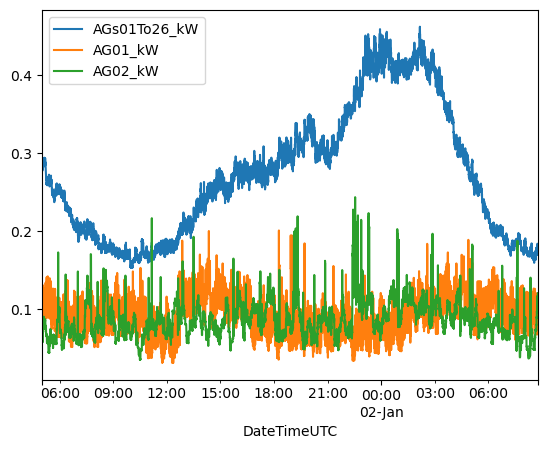

In [ ]:
df['DateTimeUTC'] = pd.to_datetime(df['DateTimeUTC'])
df = df.set_index('DateTimeUTC')

<Axes: xlabel='DateTimeUTC'>

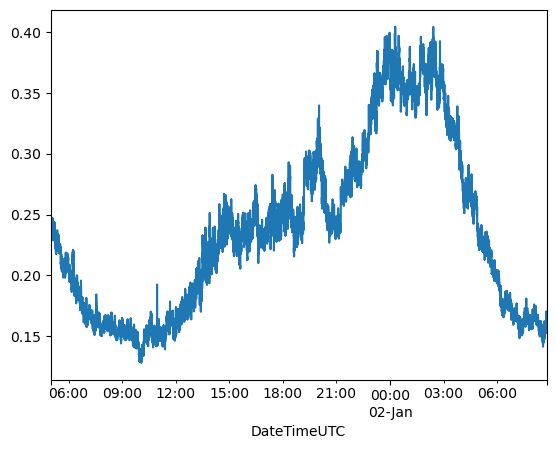

In [25]:
import numpy as np
subset = np.random.permutation(26) + 1
subset = subset.astype(int).tolist()
first_set = [f'AG{str(i).zfill(2)}_kW' for i in subset[:13]]
second_set = [f'AG{str(i).zfill(2)}_kW' for i in subset[13:]]
df_ind = df.iloc[:,1:]
df_ind[first_set].mean(axis=1)[:10000].plot()

<Axes: xlabel='DateTimeUTC'>

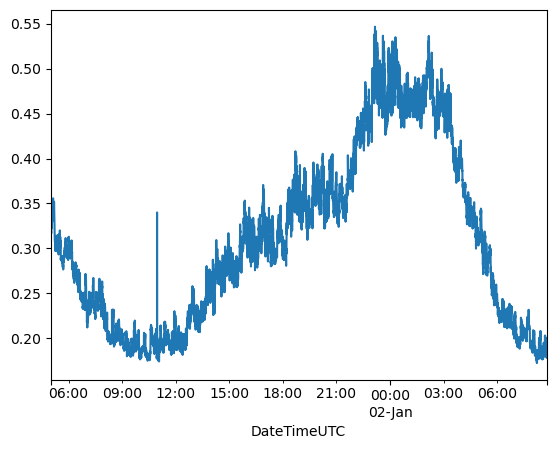

In [26]:
df_ind[second_set].mean(axis=1)[:10000].plot()

In [1]:
import pandas as pd
from datetime import datetime
from distutils.util import strtobool

def convert_tsf_to_dataframe(
    full_file_path_and_name,
    replace_missing_vals_with="NaN",
    value_column_name="series_value",
):
    col_names = []
    col_types = []
    all_data = {}
    line_count = 0
    frequency = None
    forecast_horizon = None
    contain_missing_values = None
    contain_equal_length = None
    found_data_tag = False
    found_data_section = False
    started_reading_data_section = False

    with open(full_file_path_and_name, "r", encoding="cp1252") as file:
        for line in file:
            # Strip white space from start/end of line
            line = line.strip()

            if line:
                if line.startswith("@"):  # Read meta-data
                    if not line.startswith("@data"):
                        line_content = line.split(" ")
                        if line.startswith("@attribute"):
                            if (
                                len(line_content) != 3
                            ):  # Attributes have both name and type
                                raise Exception("Invalid meta-data specification.")

                            col_names.append(line_content[1])
                            col_types.append(line_content[2])
                        else:
                            if (
                                len(line_content) != 2
                            ):  # Other meta-data have only values
                                raise Exception("Invalid meta-data specification.")

                            if line.startswith("@frequency"):
                                frequency = line_content[1]
                            elif line.startswith("@horizon"):
                                forecast_horizon = int(line_content[1])
                            elif line.startswith("@missing"):
                                contain_missing_values = bool(
                                    strtobool(line_content[1])
                                )
                            elif line.startswith("@equallength"):
                                contain_equal_length = bool(strtobool(line_content[1]))

                    else:
                        if len(col_names) == 0:
                            raise Exception(
                                "Missing attribute section. Attribute section must come before data."
                            )

                        found_data_tag = True
                elif not line.startswith("#"):
                    if len(col_names) == 0:
                        raise Exception(
                            "Missing attribute section. Attribute section must come before data."
                        )
                    elif not found_data_tag:
                        raise Exception("Missing @data tag.")
                    else:
                        if not started_reading_data_section:
                            started_reading_data_section = True
                            found_data_section = True
                            all_series = []

                            for col in col_names:
                                all_data[col] = []

                        full_info = line.split(":")

                        if len(full_info) != (len(col_names) + 1):
                            raise Exception("Missing attributes/values in series.")

                        series = full_info[len(full_info) - 1]
                        series = series.split(",")

                        if len(series) == 0:
                            raise Exception(
                                "A given series should contains a set of comma separated numeric values. At least one numeric value should be there in a series. Missing values should be indicated with ? symbol"
                            )

                        numeric_series = []

                        for val in series:
                            if val == "?":
                                numeric_series.append(replace_missing_vals_with)
                            else:
                                numeric_series.append(float(val))

                        if numeric_series.count(replace_missing_vals_with) == len(
                            numeric_series
                        ):
                            raise Exception(
                                "All series values are missing. A given series should contains a set of comma separated numeric values. At least one numeric value should be there in a series."
                            )

                        all_series.append(pd.Series(numeric_series).array)

                        for i in range(len(col_names)):
                            att_val = None
                            if col_types[i] == "numeric":
                                att_val = int(full_info[i])
                            elif col_types[i] == "string":
                                att_val = str(full_info[i])
                            elif col_types[i] == "date":
                                att_val = datetime.strptime(
                                    full_info[i], "%Y-%m-%d %H-%M-%S"
                                )
                            else:
                                raise Exception(
                                    "Invalid attribute type."
                                )  # Currently, the code supports only numeric, string and date types. Extend this as required.

                            if att_val is None:
                                raise Exception("Invalid attribute value.")
                            else:
                                all_data[col_names[i]].append(att_val)

                line_count = line_count + 1

        if line_count == 0:
            raise Exception("Empty file.")
        if len(col_names) == 0:
            raise Exception("Missing attribute section.")
        if not found_data_section:
            raise Exception("Missing series information under data section.")

        all_data[value_column_name] = all_series
        loaded_data = pd.DataFrame(all_data)

        return (
            loaded_data,
            frequency,
            forecast_horizon,
            contain_missing_values,
            contain_equal_length,
        )
        
        
df, freq, fh, cmv, cel = convert_tsf_to_dataframe('/home/user/data/wind_farms_minutely_dataset_without_missing_values.tsf')
df

,series_name,start_timestamp,series_value
0,T1,2019-08-01 00:00:01,"[559.0, 560.0, 559.0, 558.0, 559.0, 558.0, 559..."
1,T2,2019-08-01 00:00:01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,T3,2019-08-01 00:00:01,"[559.0, 561.0, 560.0, 559.0, 559.0, 560.0, 560..."
3,T4,2019-08-01 00:00:01,"[540.0, 541.0, 540.0, 539.0, 539.0, 540.0, 540..."
4,T5,2019-08-01 00:00:01,"[539.1, 539.5, 538.7, 539.1, 538.7, 538.7, 539..."
...,...,...,...
334,T335,2020-03-04 08:35:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
335,T336,2020-05-21 12:55:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
336,T337,2020-05-21 12:55:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
337,T338,2020-07-27 14:15:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [2]:
sub_df = df[df['start_timestamp'] == "2019-08-01 00:00:01"]
sub_df

,series_name,start_timestamp,series_value
0,T1,2019-08-01 00:00:01,"[559.0, 560.0, 559.0, 558.0, 559.0, 558.0, 559..."
1,T2,2019-08-01 00:00:01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,T3,2019-08-01 00:00:01,"[559.0, 561.0, 560.0, 559.0, 559.0, 560.0, 560..."
3,T4,2019-08-01 00:00:01,"[540.0, 541.0, 540.0, 539.0, 539.0, 540.0, 540..."
4,T5,2019-08-01 00:00:01,"[539.1, 539.5, 538.7, 539.1, 538.7, 538.7, 539..."
...,...,...,...
306,T307,2019-08-01 00:00:01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
307,T308,2019-08-01 00:00:01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
308,T309,2019-08-01 00:00:01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
309,T310,2019-08-01 00:00:01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [3]:
import numpy as np
all_df = []
for tsid in sub_df['series_name'].values.tolist():
    subsub_df = sub_df[sub_df['series_name'] == tsid]
    
    ts_values = subsub_df['series_value'].iloc[0].to_numpy()
    ts_values = ts_values.reshape(-1,1)
    all_df.append(ts_values)
all_df = np.concatenate(all_df, axis=1)
all_df

array([[559.,   0., 559., ...,   0.,   0.,   0.],
       [560.,   0., 561., ...,   0.,   0.,   0.],
       [559.,   0., 560., ...,   0.,   0.,   0.],
       ...,
       [300., 529., 560., ...,   0.,   0.,   0.],
       [300., 527., 560., ...,   0.,   0.,   0.],
       [300., 530., 560., ...,   0.,   0.,   0.]])

In [4]:
all_df = pd.DataFrame(all_df, columns=[f'T{i+1}'for i in range(all_df.shape[1])])
all_df

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,...,T302,T303,T304,T305,T306,T307,T308,T309,T310,T311
0,559.0,0.0,559.0,540.0,539.1,588.3,379.4,301.5,379.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,560.0,0.0,561.0,541.0,539.5,588.3,379.7,300.7,379.1,0.0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,559.0,0.0,560.0,540.0,538.7,588.3,378.9,300.7,378.6,0.0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,558.0,0.0,559.0,539.0,539.1,588.3,379.7,301.0,379.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,559.0,0.0,559.0,539.0,538.7,588.3,379.4,299.0,382.0,0.0,...,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527035,300.0,530.0,560.0,560.0,538.3,0.0,0.0,346.9,392.1,392.4,...,0.0,-0.2,69.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
527036,300.0,528.0,560.0,560.0,539.1,0.0,0.0,350.6,393.3,394.7,...,0.0,-0.2,68.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
527037,300.0,529.0,560.0,561.0,538.0,0.0,0.0,348.9,394.1,395.8,...,0.0,-0.2,69.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
527038,300.0,527.0,560.0,561.0,538.0,0.0,0.0,350.6,395.8,398.9,...,0.0,-0.2,74.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
all_df['date'] = pd.date_range('2019-08-01 00:00:00', periods=len(all_df), freq='1min')
all_df = all_df.set_index('date')
all_df = all_df.resample('5min').mean()
all_df

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,...,T302,T303,T304,T305,T306,T307,T308,T309,T310,T311
date,,,,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,559.0,0.0,559.6,539.8,539.02,588.30,379.42,300.58,379.64,0.00,...,0.0,0.0,0.26,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2019-08-01 00:05:00,558.4,0.0,560.2,540.2,538.80,588.18,379.02,298.96,379.02,0.00,...,0.0,0.0,0.16,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2019-08-01 00:10:00,559.6,0.0,559.8,540.6,538.94,588.40,380.50,299.48,381.10,0.00,...,0.0,0.0,-0.24,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2019-08-01 00:15:00,559.2,0.0,559.4,539.8,538.78,588.18,378.76,298.86,379.60,0.00,...,0.0,0.0,0.26,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2019-08-01 00:20:00,559.2,0.0,559.8,539.6,538.04,588.12,380.40,300.54,380.16,0.00,...,0.0,0.0,0.64,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31 23:35:00,299.8,528.2,558.2,557.2,538.10,0.00,0.00,351.58,396.10,396.08,...,0.0,-0.2,57.06,0.0,0.0,0.22,0.0,0.0,0.0,0.0
2020-07-31 23:40:00,300.2,526.4,558.8,556.8,537.66,0.00,0.86,349.98,392.66,395.64,...,0.0,-0.2,60.76,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2020-07-31 23:45:00,300.0,527.8,556.4,555.0,538.18,0.00,1.20,350.94,396.48,398.40,...,0.0,-0.2,63.26,0.0,0.0,0.00,0.0,0.0,0.0,0.0


T25 T26 T40 T32 T58 T87 T160 T154 T155

<Axes: xlabel='date'>

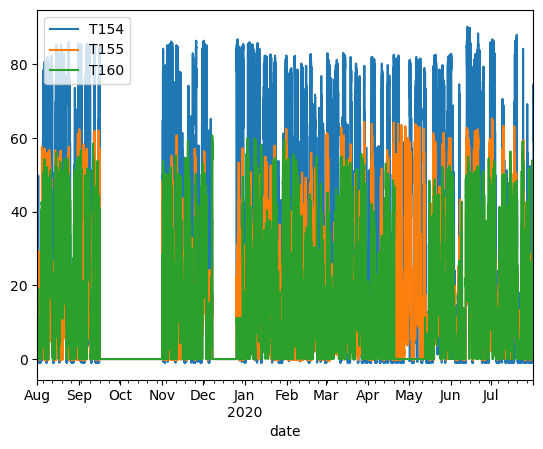

In [28]:
# all_df = all_df[['T26', 'T40', 'T32', 'T58', 'T87']]
all_df.iloc[:, [153,154,159]].plot()

In [31]:
all_df = all_df[['T154','T155']]
all_df = (all_df - all_df.min())/(all_df.max() - all_df.min())

<Axes: xlabel='date'>

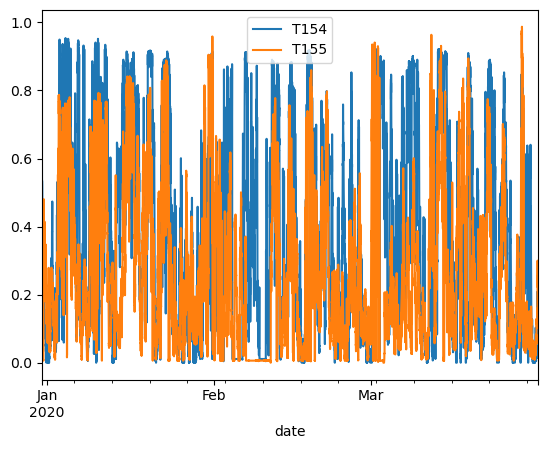

In [33]:
sel_df = all_df['2019-12-31':'2020-03-31']
# sel_df = (sel_df - sel_df.min()) / (sel_df.max() - sel_df.min())
sel_df.plot()

In [34]:
sel_df.to_csv('/home/user/data/wind_farms.csv')

In [16]:
import pyreadr
import pandas as pd
import numpy as np

all_df = []
for i in [2, 10]:
    result = pyreadr.read_r(
        f"/home/user/data/sr_data/anonymous_public_pv_power_data_per_unit/pv_power_unit_{i}.rds"
    )  # also works for RData
    df = result[None]
    df = df.set_index('utc')
    df = df[['sum']]
    df['sum'][df['sum'] > 30] = np.nan
    df = df/30.0
    
    df = df.resample('5min').mean()
    df = df.rename(columns={'sum':f'T{i}'})
    df = df.interpolate(axis=1)
    all_df.append(df)
all_df = pd.concat(all_df, axis=1)
all_df = all_df[:'2021-12']
all_df = all_df.ffill()
all_df = all_df.bfill()
all_df = all_df.interpolate(axis=1)

# all_df[all_df.isna().any(axis=1)]
# display(all_df)
all_df.to_csv('/home/user/data/sr_data/solar.csv')
# print(result)
# done!
# result is a dictionary where keys are the name of objects and the values python
# objects. In the case of Rds there is only one object with None as key

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615983 entries, 0 to 615982
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   utc     615983 non-null  datetime64[ns]
 1   unit    615983 non-null  int32         
 2   metric  615983 non-null  object        
 3   sum     615983 non-null  float64       
 4   count   615983 non-null  int32         
 5   min     615983 non-null  float64       
 6   max     615983 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(2), object(1)
memory usage: 28.2+ MB


In [ ]:
df = df.set_index('utc')

,unit,metric,sum,count,min,max
utc,,,,,,
2021-07-01 00:00:00,2,pv_power,6.046,6,0.951,1.078
2021-07-01 00:01:00,2,pv_power,7.882,6,1.138,1.624
2021-07-01 00:02:00,2,pv_power,8.500,6,1.278,1.749
2021-07-01 00:03:00,2,pv_power,9.869,6,1.341,2.406
2021-07-01 00:04:00,2,pv_power,12.977,6,1.504,3.005
...,...,...,...,...,...,...
2022-08-31 23:55:00,2,pv_power,22.297,6,3.703,3.722
2022-08-31 23:56:00,2,pv_power,22.289,6,3.703,3.727
2022-08-31 23:57:00,2,pv_power,22.283,6,3.698,3.726


<Axes: xlabel='utc'>

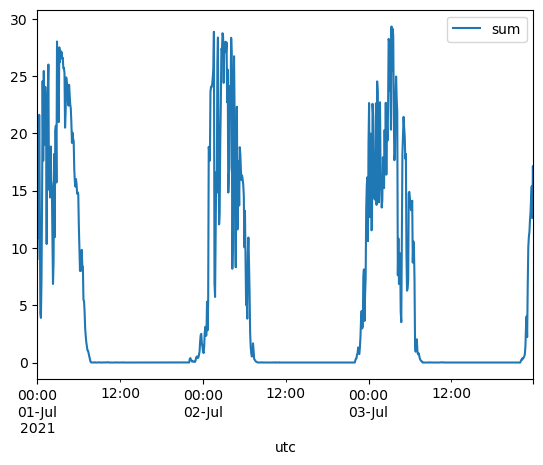

In [9]:
import numpy as np
df = df[['sum']]
df['sum'][df['sum'] > 30] = np.nan
df = df.interpolate()

df = df.resample('5min').mean()
df[:288*3].plot()

In [22]:
import pandas as pd
import numpy as np

models = ['MA-TSD','mrdiff','TMDM','SSSD','D3VAE','CSDI']
datasets = ['ECL','ETTh2','ETTm2','Exchange','traffic','weather']
all_df_mean = []
all_df_std = []
for m in models:
    df_mean = pd.read_csv(f'../assets/{m}_results.csv')
    df_mean = df_mean.set_index(['dataset','pred_len'])
    try:
        df_mean = df_mean.drop(columns='Unnamed: 0')
    except:
        pass
    
    df_mean = df_mean.loc[datasets]
    df_mean.columns = [[m, m], df_mean.columns]
    # df_mean['newlevel'] = 'C'
    # df_mean = df_mean.set_index('newlevel', append=True).unstack('newlevel')
    # df_mean.columns = pd.MultiIndex.from_product([[m]] + df_mean.columns.levels)
    
    
    df_std = pd.read_csv(f'../assets/{m}_results_std.csv')
    df_std = df_std.set_index(['dataset','pred_len'])
    try:
        df_std = df_std.drop(columns='Unnamed: 0')
    except:
        pass
    df_std = df_std.loc[datasets]
    # display(df_std)
    df_std.columns = [[m, m], df_std.columns]
    all_df_mean.append(df_mean)
    all_df_std.append(df_std)
    
    # break
# all_df_mean = pd.me
all_df_mean = pd.concat(all_df_mean, axis=1)
all_df_std = pd.concat(all_df_std, axis=1)
df = all_df_mean.round(3).astype(str) + '_{\pm' + all_df_std.round(3).astype(str)
df

# print(df.to_latex())
# print(df.to_latex(escape=False))

MA-TSD                                  mrdiff  \
                                  MSE                CRPS                 MSE   
dataset  pred_len                                                               
ECL      96        $0.288_{\pm0.003}$  $0.158_{\pm0.001}$  $0.496_{\pm0.008}$   
         192       $0.297_{\pm0.006}$   $0.16_{\pm0.002}$   $0.466_{\pm0.01}$   
         336       $0.347_{\pm0.008}$  $0.177_{\pm0.003}$  $0.496_{\pm0.009}$   
         720        $0.43_{\pm0.018}$  $0.204_{\pm0.003}$  $0.657_{\pm0.025}$   
ETTh2    96        $0.136_{\pm0.002}$  $0.121_{\pm0.001}$  $0.149_{\pm0.003}$   
         192       $0.199_{\pm0.007}$  $0.149_{\pm0.002}$  $0.194_{\pm0.004}$   
         336       $0.229_{\pm0.009}$  $0.166_{\pm0.003}$  $0.236_{\pm0.003}$   
         720       $0.284_{\pm0.017}$  $0.191_{\pm0.006}$  $0.289_{\pm0.005}$   
ETTm2    96         $0.07_{\pm0.002}$  $0.085_{\pm0.001}$  $0.122_{\pm0.042}$   
         192       $0.105_{\pm0.003}$  $0.105_{\pm0.002}$   $0.125_{\pm0.01}$   
         336       $0.136_{\pm0.004}$  $0.121_{\pm0.002}$  $0.198_{\pm0.013}$   
         720       $0.185_{\pm0.003}$  $0.143_{\pm0.002}$  $0.235_{\pm0.023}$   
Exchange 96        $0.098_{\pm0.006}$   $0.11_{\pm0.004}$  $0.102_{\pm0.005}$   
         192       $0.187_{\pm0.005}$  $0.158_{\pm0.002}$  $0.251_{\pm0.011}$   
         336       $0.333_{\pm0.017}$  $0.221_{\pm0.005}$  $0.456_{\pm0.034}$   
         720        $0.869_{\pm0.14}$  $0.382_{\pm0.037}$  $1.111_{\pm0.069}$   
traffic  96        $0.166_{\pm0.004}$  $0.112_{\pm0.003}$  $0.269_{\pm0.002}$   
         192       $0.157_{\pm0.003}$  $0.109_{\pm0.003}$  $0.228_{\pm0.001}$   
         336       $0.157_{\pm0.005}$  $0.114_{\pm0.004}$  $0.225_{\pm0.011}$   
         720        $0.184_{\pm0.01}$  $0.128_{\pm0.007}$   $0.267_{\pm0.01}$   
weather  96        $0.096_{\pm0.001}$  $0.102_{\pm0.002}$  $0.108_{\pm0.006}$   
         192       $0.146_{\pm0.004}$  $0.126_{\pm0.002}$  $0.152_{\pm0.003}$   
         336       $0.225_{\pm0.006}$  $0.161_{\pm0.005}$  $0.221_{\pm0.006}$   
         720       $0.362_{\pm0.007}$  $0.211_{\pm0.003}$   $0.35_{\pm0.004}$   

                                                     TMDM                      \
                                 CRPS                 MSE                CRPS   
dataset  pred_len                                                               
ECL      96        $0.226_{\pm0.004}$  $0.348_{\pm0.018}$  $0.175_{\pm0.006}$   
         192       $0.218_{\pm0.002}$    $0.38_{\pm0.02}$  $0.182_{\pm0.005}$   
         336       $0.224_{\pm0.006}$  $0.423_{\pm0.016}$  $0.192_{\pm0.004}$   
         720       $0.275_{\pm0.006}$  $0.478_{\pm0.025}$  $0.203_{\pm0.005}$   
ETTh2    96        $0.134_{\pm0.001}$  $0.208_{\pm0.015}$  $0.141_{\pm0.006}$   
         192       $0.155_{\pm0.002}$   $0.241_{\pm0.01}$  $0.156_{\pm0.004}$   
         336       $0.176_{\pm0.002}$  $0.277_{\pm0.009}$   $0.17_{\pm0.002}$   
         720       $0.194_{\pm0.003}$  $0.278_{\pm0.006}$  $0.169_{\pm0.003}$   
ETTm2    96        $0.105_{\pm0.015}$   $0.09_{\pm0.008}$  $0.089_{\pm0.004}$   
         192       $0.112_{\pm0.004}$  $0.142_{\pm0.008}$  $0.114_{\pm0.004}$   
         336       $0.144_{\pm0.008}$   $0.187_{\pm0.02}$  $0.132_{\pm0.006}$   
         720       $0.157_{\pm0.007}$  $0.297_{\pm0.061}$  $0.166_{\pm0.015}$   
Exchange 96        $0.104_{\pm0.003}$  $0.392_{\pm0.096}$  $0.196_{\pm0.025}$   
         192        $0.17_{\pm0.003}$   $0.67_{\pm0.097}$  $0.297_{\pm0.019}$   
         336        $0.22_{\pm0.006}$  $0.929_{\pm0.116}$  $0.333_{\pm0.011}$   
         720       $0.353_{\pm0.015}$   $1.163_{\pm0.27}$  $0.358_{\pm0.036}$   
traffic  96        $0.153_{\pm0.002}$  $0.209_{\pm0.019}$  $0.114_{\pm0.004}$   
         192       $0.136_{\pm0.001}$   $0.172_{\pm0.01}$  $0.105_{\pm0.005}$   
         336       $0.137_{\pm0.007}$   $0.161_{\pm0.01}$  $0.102_{\pm0.005}$   
         720       $0.155_{\pm0.005}$    $0.18_{\pm0.01}$  $0

tensor(0.0115)
tensor(0.9994)
tensor(0.9000)
tensor(0.9994)
tensor(0.0006)
tensor(0.1000)


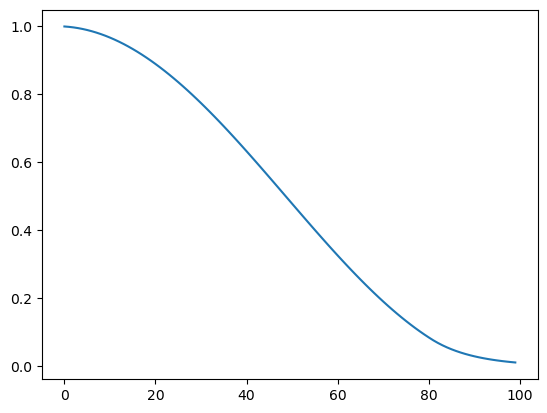

In [1]:
import torch
import matplotlib.pyplot as plt

from src.utils.schedule import cosine_schedule, linear_schedule
beta = cosine_schedule(100)
# beta = torch.load('/home/user/data/MAD_sr_benchcos/savings/wind_576_S/cosine_sched_100.pt')
print(beta['alpha_bars'].min())
print(beta['alpha_bars'].max())
print(beta['alphas'].min())
print(beta['alphas'].max())
print(beta['betas'].min())
print(beta['betas'].max())

plt.plot((beta['alpha_bars']))
# torch.sqrt(beta['alpha_bars'])

In [14]:
import torch
import numpy as np
first = np.load('/home/user/data/MAD_sr_benchcos/savings/mfred_576_S/MADTC_NFD_DIT_eps_T100_bs64_condNone_ksNone/cond_sr_startks_3_fast_False_dtm_True_strategy_None_pred.npy')
print(first[0,0,:5])

second = np.load('/home/user/data/MAD_sr/savings/mfred_576_S/MADTC_NFD_DIT_eps_bs64_condNone_ksNone/cond_sr_startks_3_fast_False_dtm_True_pred.npy')
print(second[0,0,:5])


[[-0.18911086]
 [-0.2634299 ]
 [-0.31007087]
 [-0.36582556]
 [-0.5070133 ]]
[[-0.18911086]
 [-0.2634299 ]
 [-0.31007087]
 [-0.36582556]
 [-0.5070133 ]]
